In [1]:
## From: https://towardsdatascience.com/web-scraping-craigslist-a-complete-tutorial-c41cea4f4981

#import get to call a get request on the site
from requests import get

#get the first page of the housing prices
response = get('https://minneapolis.craigslist.org/search/apa?hasPic=1&availabilityMode=0') #get rid of those lame-o's that post a housing option without a pic using their filter

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print( len(posts)) #to double check I got 120 (elements/page)
post = posts[0]

<class 'bs4.element.ResultSet'>
120


In [2]:
print(post)

<li class="result-row" data-pid="7137180684" data-repost-of="7062028991">
<a class="result-image gallery" data-ids="1:00y0y_6005L2b4Muv,1:00i0i_cfWmZtpngb6,1:00B0B_jHZPMtZubnq,1:00q0q_fMDPkke75cd,1:00F0F_2hpHFpdTL3E,1:00b0b_kWDdWK6BInc,1:00S0S_gLH1t4crq0L,1:00q0q_laudEaZIbbe,1:00t0t_csDvgTi7mdl,1:01010_iI0M5PmtxRa,1:01313_bHjDbCnh4Go,1:00j0j_aSujzod5oJd,1:00v0v_jpaRSCTbcwq,1:00D0D_7ofamCWTwQo,1:00N0N_fipIv6mwODL,1:00b0b_ixYGFIGTfv3,1:00808_5DLMQ2uGVoP,1:00707_k1XIVOz83aM" href="https://minneapolis.craigslist.org/wsh/apa/d/river-falls-3-bedroom-townhome-1800/7137180684.html">
<span class="result-price">$1800</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-06-06 17:54" title="Sat 06 Jun 05:54:07 PM">Jun  6</time>
<a class="result-title hdrlnk" data-id="7137180684" href="https://minneapolis.craigslist.org/wsh/apa/d/river-falls-3-bedroom-townhome-1800/

In [3]:
curtime = post.find('time',class_='result-date')['datetime']
print(curtime)
cururl = post.find('a',class_='result-title hdrlnk')['href']
print(cururl)

2020-06-06 17:54
https://minneapolis.craigslist.org/wsh/apa/d/river-falls-3-bedroom-townhome-1800/7137180684.html


In [4]:
#curbrs = post.find('span', class_ = 'housing').text.split()[0][:-2]
#print(curbrs)

#cursqft = post.find('span', class_ = 'housing')
#if cursqft:
#    cursqft = cursqft.text.split()[2][:-3] #cleans the ft2 at the end
#    print(cursqft)
#print(cursqft)

curhood = post.find('span', class_='result-hood') 
if curhood:
    curhood = curhood.text
    print(curhood)



 (River Falls, WI)


In [5]:
from geopy.geocoders import Nominatim, ArcGIS
curmap = BeautifulSoup(get(cururl).text,'html.parser').find_all('div',class_='mapbox')[0]
geolocator = Nominatim(user_agent="darren")

print(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])

location = geolocator.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])


geolocator2 = ArcGIS(user_agent="darren")
location2 = geolocator2.reverse(query=curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'],
                                distance=500)





import numpy as np

loc = geolocator.reverse(query=str(np.round(float(curmap.find('div')['data-latitude'])-.001,3))
                   +","
                   +str(np.round(float(curmap.find('div')['data-longitude'])-.001,3)))
    
print(location.address)
print(location2.address)
print(loc.address)

#print(location.raw['address'])
#print(location.raw['address']['city'])
#print(location.raw['address']['neighbourhood'])
#print(location.raw['address']['postcode'])

44.855000,-92.631300
University Falls East, 205, West Cascade Avenue, River Hills, River Falls, Pierce County, Wisconsin, 54022, United States of America
404 S Winter St, River Falls, Wisconsin 54022, USA
233, West Cascade Avenue, River Hills, River Falls, Pierce County, Wisconsin, 54022, United States of America


In [6]:
curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
print(curmap)

[<div class="mapbox">
<div class="viewposting" data-accuracy="22" data-latitude="44.855000" data-longitude="-92.631300" id="map"></div>
<div class="mapaddress">1891 Bennett St</div>
</div>]


In [7]:
#new code to put here:
#get list of neighborhoods
#for each neighborhood,
#  get central coordinate
#for each posting
#  calculate distance from neighborhoods' centers
#  assign neighborhood based on nearest neighbor

In [8]:
#linkpfx = 'https://minneapolis.craigslist.org/search/apa?'
#linksfx =( 'sort=date'
#          +'&hasPic=1'
#          +'&bundleDuplicates=1'
#          +'&search_distance=20'
#          +'&postal=55454'
#          +'&min_price=500'
#          +'&max_price=4000'
#          +'&max_bedrooms=3'
#          +'&availabilityMode=0'
#          +'&sale_date=all+dates')
#response = get(linkpfx+linksfx)
#html_soup = BeautifulSoup(response.text, 'html.parser')
#results_num = html_soup.find('div', class_= 'search-legend')
#results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
#pages = np.arange(0, results_total+1, 120)
#print(results_total)
#print(pages)

In [41]:
#build out the loop
from bs4 import BeautifulSoup
from time import sleep, time
import re
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from IPython.core.display import clear_output
import numpy as np


linkpfx = 'https://minneapolis.craigslist.org/search/apa?'
linksfx =( 'sort=date'
          +'&hasPic=1'
          +'&bundleDuplicates=1'
          +'&search_distance=20'
          +'&postal=55454'
          +'&min_price=400'
          +'&max_price=4000'
          +'&max_bedrooms=3'
          +'&availabilityMode=0'
          +'&sale_date=all+dates')
response = get(linkpfx+linksfx)
html_soup = BeautifulSoup(response.text, 'html.parser')
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text) #pulled the total count of posts as the upper bound of the pages array
pages = np.arange(0, results_total+1, 120)


from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="derinkuyu",timeout=5)

#
TypeDict = {
    'apartment': 1, 
    'condo':2, 
    'cottage/cabin':3, 
    'duplex':4, 
    'flat':5, 
    'house':6, 
    'in-law':7, 
    'loft':8, 
    'townhouse':9, 
    'manufactured':10, 
    'assisted living':11, 
    'land':12}
LaundryDict = {
    'w/d in unit':1,
    'w/d hookups':2,
    'laundry in bldg':3,
    'laundry on site':4,
    'no laundry on site':5
}    
ParkingDict = {
    'carport':1,
    'attached garage':2,
    'detached garage':3,
    'off-street parking':4,
    'street parking':5,
    'valet parking':6,
    'no parking':7
}

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
bedroom_counts = []
sqfts = []
post_links = []
post_prices = []


cities = []
towns = []
neighborhoods = []
zips = []


types = []
laundries = []
parkings = []

for page in pages[0:5]:
    
    #get request
    response = get(linkpfx
                   + 's=' #parameter for defining page number
                   + str(page) #page in above array
                   + linksfx)    
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:
        #sleep(1.1)
        
        curpost = get(post.find('a', class_='result-title hdrlnk')['href']).text
        curmap = BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')
        
        if (post.find('span', class_ = 'result-hood') is not None) and curmap:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #
            #curpost = get(post_link).text
            curmap = curmap[0] #BeautifulSoup(curpost,'html.parser').find_all('div',class_='mapbox')[0]
            location = geolocator.reverse(curmap.find('div')['data-latitude']+","+curmap.find('div')['data-longitude'])
            
            try: 
                cities.append(location.raw['address']['city'])
            except:
                try: 
                    cities.append(location.raw['address']['town'])
                except:
                    cities.append('')
            
            try: 
                towns.append(location.raw['address']['town'])
            except:
                towns.append('')
            
            try:
                neighborhoods.append(location.raw['address']['neighbourhood'])
            except:
                try: 
                    locshift1 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])+.001)+","+str(float(curmap.find('div')['data-longitude'])+.001))
                    neighborhoods.append(locshift1.raw['address']['neighbourhood'])
                except:                   
                    try: 
                        locshift2 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])-.001)+","+str(float(curmap.find('div')['data-longitude'])-.001))
                        neighborhoods.append(locshift2.raw['address']['neighbourhood'])
                    except:
                        try:
                            neighborhoods.append(location.raw['address']['town'])
                        except:
                            try:
                                neighborhoods.append(location.raw['address']['city'])
                            except:
                                neighborhoods.append('')
                    #except:
                    #    try: 
                    #        locshift3 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])+.001)+","+str(float(curmap.find('div')['data-longitude'])-.001))
                    #        neighborhoods.append(locshift3.raw['address']['neighbourhood'])
                    #    except:
                    #        try:
                    #            locshift4 = geolocator.reverse( str(float(curmap.find('div')['data-latitude'])-.001)+","+str(float(curmap.find('div')['data-longitude'])+.001))
                    #            neighborhoods.append(locshift4.raw['address']['neighbourhood'])
                    #        except:
                    #            neighborhoods.append('')
            
            try:
                zips.append(location.raw['address']['postcode'])
            except:
                zips.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                typename = list(set(curattr.text.split('\n')).intersection(list(TypeDict.keys())))[0]
                types.append(TypeDict[typename])
            except:
                types.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                laundryname = list(set(curattr.text.split('\n')).intersection(list(LaundryDict.keys())))[0]
                laundries.append(LaundryDict[laundryname])
            except:
                laundries.append('')
            
            try:
                curattr = BeautifulSoup(curpost,'html.parser').find_all('p',class_='attrgroup')[1]
                parkname = list(set(curattr.text.split('\n')).intersection(list(ParkingDict.keys())))[0]
                parkings.append(ParkingDict[parkname])
            except:
                parkings.append('')
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            post_price = int(post.a.text.strip().replace("$", "")) 
            post_prices.append(post_price)
            
            if post.find('span', class_ = 'housing') is not None:
                
                #if the first element is accidentally square footage
                if 'ft2' in post.find('span', class_ = 'housing').text.split()[0]:
                    
                    #make bedroom nan
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                    
                    #make sqft the first element
                    sqft = int(post.find('span', class_ = 'housing').text.split()[0][:-3])
                    sqfts.append(sqft)
                    
                #if the length of the housing details element is more than 2
                elif len(post.find('span', class_ = 'housing').text.split()) > 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = int(post.find('span', class_ = 'housing').text.split()[2][:-3])
                    sqfts.append(sqft)
                    
                #if there is num bedrooms but no sqft
                elif len(post.find('span', class_ = 'housing').text.split()) == 2:
                    
                    #therefore element 0 will be bedroom count
                    bedroom_count = post.find('span', class_ = 'housing').text.replace("br", "").split()[0]
                    bedroom_counts.append(bedroom_count)
                    
                    #and sqft will be number 3, so set these here and append
                    sqft = np.nan
                    sqfts.append(sqft)                    
                
                else:
                    bedroom_count = np.nan
                    bedroom_counts.append(bedroom_count)
                
                    sqft = np.nan
                    sqfts.append(sqft)
                
            #if none of those conditions catch, make bedroom nan, this won't be needed    
            else:
                bedroom_count = np.nan
                bedroom_counts.append(bedroom_count)
                
                sqft = np.nan
                sqfts.append(sqft)
            
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

import pandas as pd

apts = pd.DataFrame({
    'posted': post_timing,
    'neighborhood': post_hoods,
    'post title': post_title_texts,
    'number bedrooms': bedroom_counts,
    'sqft': sqfts,
    'URL': post_links,
    'price': post_prices,
    'cities':cities,
    'towns':towns,
    'neighborhoods':neighborhoods,
    'zips': zips,
    'types':types,
    'parking':parkings,
    'laundry':laundries})
#print(apts.info())
#apts.head(30)
apts.shape

#drop duplicates
apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])

#make the number bedrooms to a float (since np.nan is a float too)
apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))

#convert datetime string into datetime object to be able to work with it
from datetime import datetime

apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

apts.to_csv(path_or_buf='./apts_'+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
apts.shape


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!


Scrape complete!


(86, 14)

In [42]:
##drop duplicates
#apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
#
##make the number bedrooms to a float (since np.nan is a float too)
#apts['number bedrooms'] = apts['number bedrooms'].apply(lambda x: float(x))
#
##convert datetime string into datetime object to be able to work with it
#from datetime import datetime
#
#apts['posted'] = pd.to_datetime(apts['posted'])

#Looking at what neighborhoods there are with apts['neighborhood'].unique() allowed me to see what
#I needed to deal with in terms of cleaning those.

##remove the parenthesis from the left and right of the neighborhoods
#apts['neighborhood'] = apts['neighborhood'].map(lambda x: x.lstrip('(').rstrip(')'))
#
##titlecase them
#apts['neighborhood'] = apts['neighborhood'].str.title()
#
##just take the first name of the neighborhood list, splitting on the '/' delimiter
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.split('/')[0])
#
##fix one-offs that
#apts['neighborhood'].replace('Belmont, Ca', 'Belmont', inplace=True)
#apts['neighborhood'].replace('Hercules, Pinole, San Pablo, El Sob', 'Hercules', inplace=True)
#
##remove whitespaces
#apts['neighborhood'] = apts['neighborhood'].apply(lambda x: x.strip())

#save the clean data

#apts.to_csv(path_or_buf='./apts_'+str(datetime.now()).replace(' ','_').replace(':','-')+'.csv', index=False)
#apts.shape

In [43]:
import os
import glob
aptfiles = glob.glob('apts_*')
for file in aptfiles:
    apts = apts.append(pd.read_csv(file),ignore_index=True)
apts = apts.drop_duplicates(subset=['URL','sqft','number bedrooms'])
apts.shape

(716, 14)

In [44]:
print(apts.neighborhoods)

0       Highland Village
1           Eden Prairie
2              Excelsior
3               St. Paul
4                Wenonah
              ...       
997         New Brighton
998      Lowry Hill East
999         New Brighton
1000        New Brighton
1001        Marcy-Holmes
Name: neighborhoods, Length: 716, dtype: object


In [45]:
apts.describe()

,number bedrooms,sqft,price,types
count,699.000000,646.000000,716.000000,712.000000
mean,1.731044,1017.009288,1420.103352,1.893258
std,0.750775,508.395454,497.752280,2.193805
min,1.000000,103.000000,475.000000,1.000000
25%,1.000000,733.500000,1065.000000,1.000000
50%,2.000000,900.000000,1349.000000,1.000000
75%,2.000000,1198.000000,1668.000000,1.000000
max,5.000000,8500.000000,3984.000000,9.000000


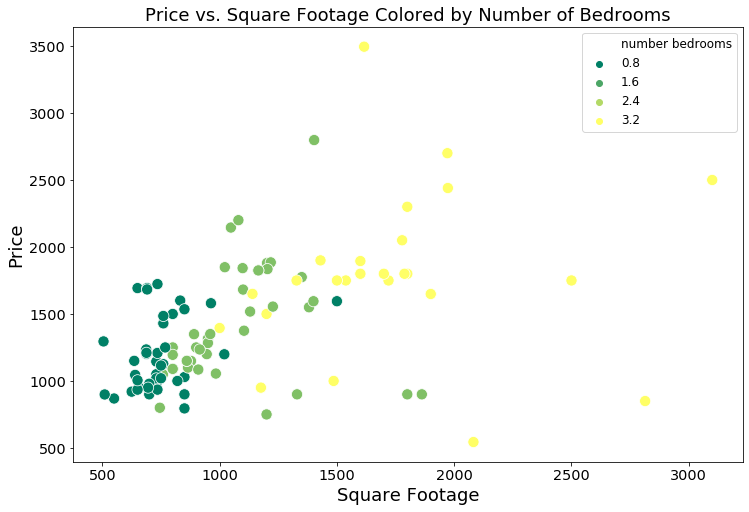

In [46]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft', y='price', hue='number bedrooms', palette='summer', x_jitter=True, y_jitter=True, s=125, data=apts.dropna())
plt.legend(fontsize=12)
plt.xlabel("Square Footage", fontsize=18)
plt.ylabel("Price", fontsize=18);
plt.title("Price vs. Square Footage Colored by Number of Bedrooms", fontsize=18);


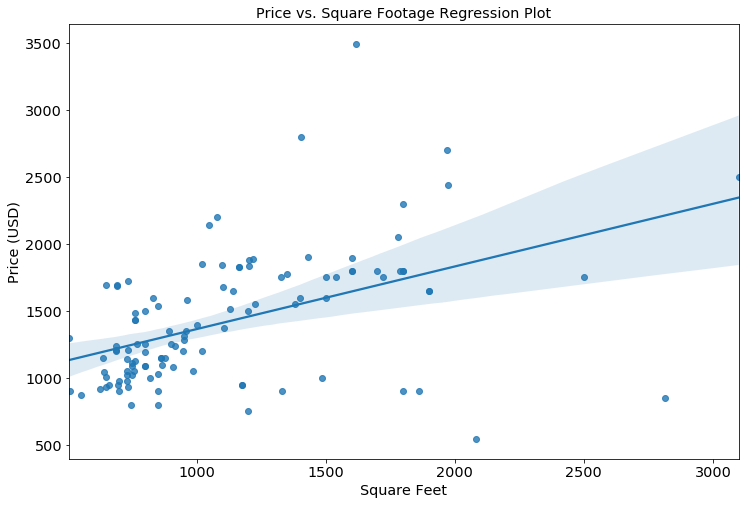

In [47]:
plt.figure(figsize=(12, 8))
sns.regplot(x='sqft', y='price', data=apts.dropna());
plt.title('Price vs. Square Footage Regression Plot');
plt.xlabel("Square Feet");
plt.ylabel("Price (USD)");

In [48]:
apts.corr()

,number bedrooms,sqft,price,types
number bedrooms,1.000000,0.623532,0.327929,0.437987
sqft,0.623532,1.000000,0.370797,0.422146
price,0.327929,0.370797,1.000000,0.098847
types,0.437987,0.422146,0.098847,1.000000


In [49]:
apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()

,number bedrooms,sqft,price,types
neighborhoods,,,,
Anoka,1.0,NaN,895.0,1.0
Apple Valley,1.0,NaN,1095.0,7.0
Aquila,1.0,815.0,1025.0,1.5
Avenida,1.0,1342.0,1885.0,9.0
Blackstone,1.0,725.0,1693.0,1.0
...,...,...,...,...
West Calhoun,1.0,600.0,1095.0,1.0
West St. Paul,1.0,750.0,1074.5,1.0
Whittier,1.0,560.0,1025.0,1.0


In [50]:
#correct oddly named locations
apts['neighborhoods'].replace('Uptown Minneapolis', 'Uptown', inplace=True)

apts[apts['number bedrooms']<=1].groupby('neighborhoods').median()['price'].sort_values()

neighborhoods
Wenonah             750.0
Kingfield           845.0
Anoka               895.0
Maplewood           895.0
Richfield           899.0
                    ...  
St Anthony West    1600.0
Marcy-Holmes       1604.5
East Calhoun       1650.0
Blackstone         1693.0
Avenida            1885.0
Name: price, Length: 68, dtype: float64

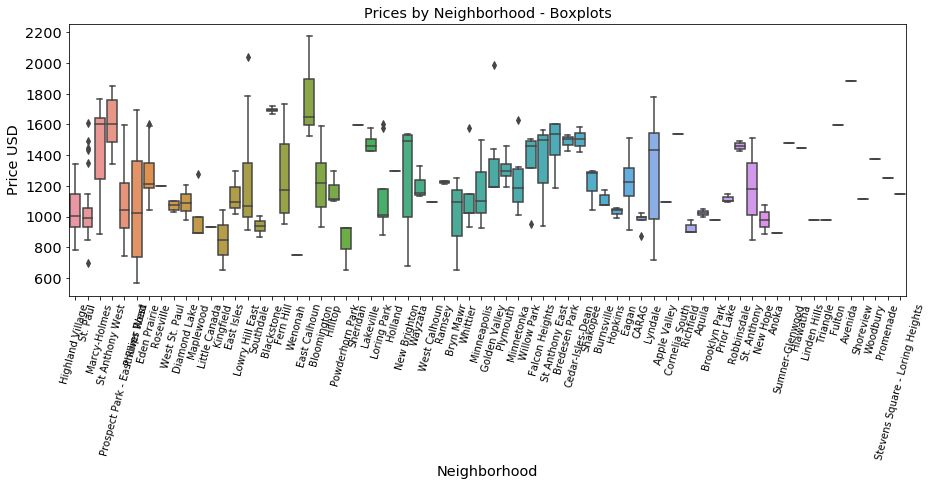

In [51]:
sns.boxplot(x='neighborhoods', y='price', data=apts[apts['number bedrooms']<=1])
plt.xlabel("Neighborhood");
plt.xticks(rotation=75,size=10)
plt.ylabel("Price USD");
plt.title("Prices by Neighborhood - Boxplots");

In [72]:
# drop problematic cols
apts = apts.dropna(subset=['price','number bedrooms','sqft','neighborhoods','types','laundry','parking'])
print(apts.shape)

# recode neighborhoods
apts_onehot = apts.copy()
apts_onehot = pd.get_dummies(apts_onehot, columns=['cities'], prefix = ['ct'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['neighborhoods'], prefix = ['nb'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['types'], prefix = ['ty'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['laundry'], prefix = ['ld'])
apts_onehot = pd.get_dummies(apts_onehot, columns=['parking'], prefix = ['pk'])

print(apts_onehot)

(550, 14)
                   posted  \
0     2020-06-07 06:51:00   
1     2020-06-07 06:50:00   
2     2020-06-07 05:40:00   
3     2020-06-07 05:17:00   
4     2020-06-07 04:50:00   
...                   ...   
997   2020-06-06 14:48:00   
998   2020-06-06 14:48:00   
999   2020-06-06 14:48:00   
1000  2020-06-06 14:47:00   
1001  2020-06-06 14:47:00   

                                                    neighborhood  \
0                                                     (St. Paul)   
1                                                 (Eden Prairie)   
2      (Excelsior, Lake Minnetonka, Minnetonka, Western Suburbs)   
3                                                     (St. Paul)   
4                              (5417 44th Ave S Minneapolis, MN)   
...                                                          ...   
997                                               (New Brighton)   
998                                         (Uptown Minneapolis)   
999                          

In [73]:
from sklearn import linear_model

maincols = ['number bedrooms','sqft']
nbcols = [col for col in apts_onehot if col.startswith('ct')]
for c in nbcols:
    maincols.append(c) 
nbcols = [col for col in apts_onehot if col.startswith('nb')]
for c in nbcols:
    maincols.append(c) 
tycols = [col for col in apts_onehot if col.startswith('ty')]
for c in nbcols:
    maincols.append(c) 
pkcols = [col for col in apts_onehot if col.startswith('pk')]
for c in nbcols:
    maincols.append(c) 
ldcols = [col for col in apts_onehot if col.startswith('ld')]
for c in nbcols:
    maincols.append(c) 

    
reg = linear_model.LinearRegression()
y = apts_onehot['price'].values.reshape(-1,1)
X = apts_onehot[maincols].values
#X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

reg.fit(y=y,X=X)
#print(reg.coef_)
#print(reg.intercept_)

#
apts_onehot['price_est'] = np.zeros((apts_onehot.shape[0],1))
apts_onehot['price_est'] = reg.predict(X)
apts_onehot['price_dif'] = apts_onehot['price']-apts_onehot['price_est']
apts_onehot['price_difpct'] = (apts_onehot['price_dif'] / apts_onehot['price_est']) * 100

In [74]:
apts_onehot['price_difpct']

0       -3.842846
1       -5.157608
2       -0.000233
3       -2.508204
4        0.000020
          ...    
997     32.230179
998     58.854260
999     13.896326
1000    16.953946
1001   -48.200056
Name: price_difpct, Length: 550, dtype: float64

In [77]:
pd.options.display.max_colwidth = 200

apts_onehot[apts_onehot['price_difpct']<=-20].sort_values('price_difpct',ascending=True)['URL'] #('neighborhoods').median()['price'].sort_values()
#apts_onehot[apts_onehot['price_dif']<=-300].URL #[['price','price_est','price_dif','URL']]

19        https://minneapolis.craigslist.org/ram/apa/d/saint-paul-spacious-bright-3-bedroom-1/7137274429.html
745          https://minneapolis.craigslist.org/csw/apa/d/minneapolis-fne-dnng-spacous-home-d/7133063641.html
746          https://minneapolis.craigslist.org/wsh/apa/d/minneapolis-fne-dnng-spacous-home-d/7133061709.html
103           https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-chrming-house-band-new/7133058520.html
730       https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-super-clean-beautiful-open/7129175541.html
884           https://minneapolis.craigslist.org/hnp/apa/d/saint-paul-great-home-great-garage/7120747708.html
53            https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-just-move-in-and-relax/7137217175.html
49        https://minneapolis.craigslist.org/csw/apa/d/minneapolis-nicely-updated-2bd-rambler/7137209110.html
1001     https://minneapolis.craigslist.org/hnp/apa/d/minneapolis-student-housing-perfect-fit/7137071204.html
973       

In [71]:
apts['cities'].unique()

array(['St. Paul', 'Eden Prairie', 'Excelsior', 'Minneapolis', 'Woodbury',
       'Edina', 'Mounds View', 'Roseville', 'West St. Paul', 'Richfield',
       'Shoreview', 'Little Canada', 'St. Anthony', 'Hilltop',
       'Chanhassen', 'Bloomington', 'Eagan', 'South St. Paul',
       'Maplewood', 'Plymouth', 'Coon Rapids', 'Blaine', 'Maple Grove',
       'Saint Louis Park', 'Burnsville', 'Inver Grove Heights', 'Chaska',
       'Lakeville', 'Minnetonka', 'New Brighton', 'Wayzata', 'Ramsey',
       'Robbinsdale', 'New Hope', 'Golden Valley', 'Mound',
       'Falcon Heights', 'Hopkins', 'Shakopee', 'North St. Paul', 'Grant',
       'Brooklyn Park', 'Mahtomedi', 'Brooklyn Center', 'Savage'],
      dtype=object)